<a href="https://colab.research.google.com/github/BelKaty/-Python-Data-Science-Numpy-Matplotlib-Scikit-learn/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B9%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn

### Курсовой проект

Задание:

Метрика: R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Необходимо получить R2 > 0.6.

Материалы к проекту (файлы):

train.csv

test.csv

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from datetime import datetime
import random as rnd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

Загружаем данные:
<p/>Id - идентификационный номер квартиры
<p/>DistrictId - идентификационный номер района
<p/>Rooms - количество комнат
<p/>Square - площадь
<p/>LifeSquare - жилая площадь
<p/>KitchenSquare - площадь кухни
<p/>Floor - этаж
<p/>HouseFloor - количество этажей в доме
<p/>HouseYear - год постройки дома
<p/>Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
<p/>Social_1, Social_2, Social_3 - социальные показатели местности
<p/>Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
<p/>Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
<p/>Price - цена квартиры

In [2]:
TEST = '/content/test.csv'
TRAIN = '/content/train.csv'

Вывод первых нескольких строк test

In [3]:
test = pd.read_csv(TEST, engine='python', on_bad_lines='skip')
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.00,69.26,NaN,1.00,6,1.00,1977,0.08,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,4702.00,5,5,B
3,15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,NaN,0,0,A


Размерность тренировочных данных



In [4]:
test.shape

(5000, 19)

Вывод первых нескольких строк train

In [5]:
train = pd.read_csv(TRAIN, engine='python', on_bad_lines='skip')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,NaN,0,11,B,184966.93
1,15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,300009.45
2,4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,220925.91
3,5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,1084.00,0,5,B,175616.23
4,10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,2078.00,2,4,B,150226.53


Размерность тестовых данных

In [6]:
test.shape

(5000, 19)

#EDA

Типы данных в тренировочном датасете

In [7]:
train.dtypes

,0
Id,int64
DistrictId,int64
Rooms,float64
Square,float64
LifeSquare,float64
KitchenSquare,float64
Floor,int64
HouseFloor,float64
HouseYear,int64
Ecology_1,float64


Выводим все строки и проверяем столбцы с нулевым значением. Сбросим настройки вывода строк

In [8]:
pd.set_option('display.max_rows', None)
print(train.isnull().sum(axis=0))
pd.reset_option('display.max_rows')

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64


Статистика по датафрейму

In [9]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00,10000.00,10000.00,10000.00,7887.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,5202.00,10000.00,10000.00,10000.00
mean,8383.41,50.40,1.89,56.32,37.20,6.27,8.53,12.61,3990.17,0.12,24.69,5352.16,8.04,1142.90,1.32,4.23,214138.86
std,4859.02,43.59,0.84,21.06,86.24,28.56,5.24,6.78,200500.26,0.12,17.53,4006.80,23.83,1021.52,1.49,4.81,92872.29
min,0.00,0.00,0.00,1.14,0.37,0.00,1.00,0.00,1910.00,0.00,0.00,168.00,0.00,0.00,0.00,0.00,59174.78
25%,4169.50,20.00,1.00,41.77,22.77,1.00,4.00,9.00,1974.00,0.02,6.00,1564.00,0.00,350.00,0.00,1.00,153872.63
50%,8394.50,36.00,2.00,52.51,32.78,6.00,7.00,13.00,1977.00,0.08,25.00,5285.00,2.00,900.00,1.00,3.00,192269.64
75%,12592.50,75.00,2.00,65.90,45.13,9.00,12.00,17.00,2001.00,0.20,36.00,7227.00,5.00,1548.00,2.00,6.00,249135.46
max,16798.00,209.00,19.00,641.07,7480.59,2014.00,42.00,117.00,20052011.00,0.52,74.00,19083.00,141.00,4849.00,6.00,23.00,633233.47


# Визуализируем данные

Отделим численные признаки

In [10]:
def numeric_and_string_attributes(df):
    num_cols = []
    str_cols = []
    cols_and_type = df.dtypes.to_dict()

    for col in cols_and_type:
        if cols_and_type[col] in ('int64', 'float64'):
            num_cols.append(col)
        else:
            str_cols.append(col)

    return num_cols, str_cols
num_cols, str_cols = numeric_and_string_attributes(train)
print(num_cols)

['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price']


Строковые признаки

In [11]:
print(str_cols)

['Ecology_2', 'Ecology_3', 'Shops_2']


Создадим словарь признаков

In [12]:
translate_col = {
    'Id': 'идентификационный номер квартиры',
    'DistrictId': 'идентификационный номер района',
    'Rooms': 'количество комнат',
    'Square': 'площадь',
    'LifeSquare': 'жилая площадь',
    'KitchenSquare': 'площадь кухни',
    'Floor': 'этаж',
    'HouseFloor': 'количество этажей в доме',
    'HouseYear': 'год постройки дома',
    'Ecology_1': 'экологические показатели месности 1',
    'Ecology_2': 'экологические показатели месности 2',
    'Ecology_3': 'экологические показатели месности 3',
    'Social_1': 'социальные показатели месности 1',
    'Social_2': 'социальные показатели месности 2',
    'Social_3': 'социальные показатели месности 3',
    'Healthcare_1': 'показатели месности,\n связанные с охраной здоровья 1',
    'Helthcare_2': 'показатели месности,\n связанные с охраной здоровья 2',
    'Shops_1': 'показатели связанные с наличием\n магазинов, торговых центров 1',
    'Shops_2': 'показатели связанные с наличием\n магазинов, торговых центров 2',
    'Price': 'цена квартиры'
}

# Визуализируем распределение числовых признаков

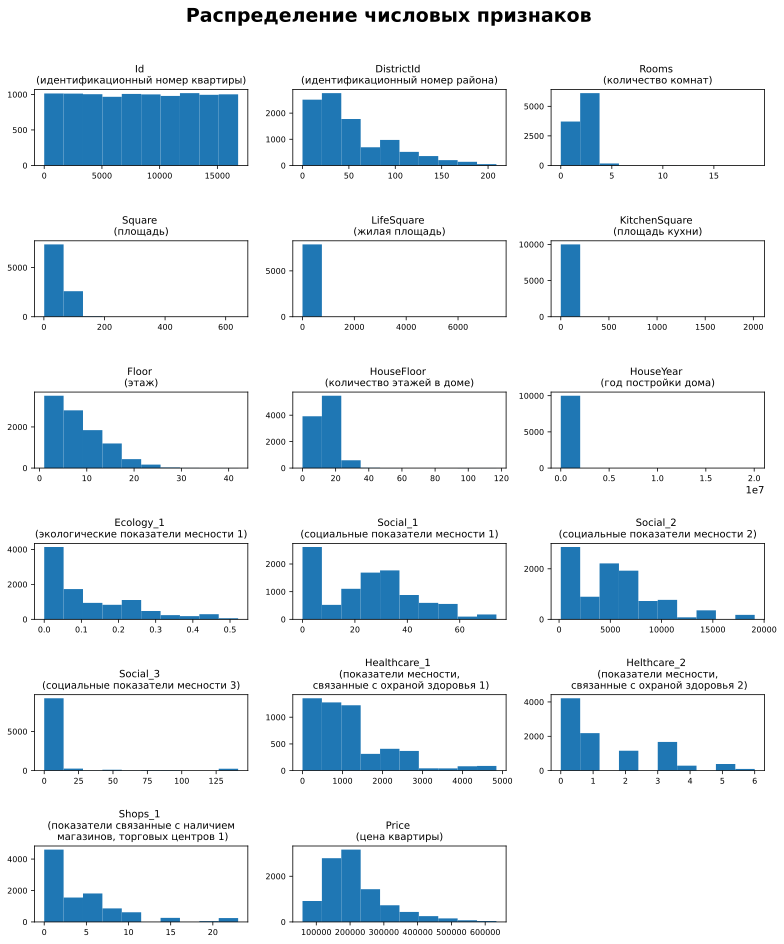

In [13]:
def num_attr(X=train, translate_col=translate_col, dop_text=''):

    plt.figure(figsize=[11, 13])

    plt.suptitle('Распределение числовых признаков '  + dop_text,
                  y=1.005,
                  fontsize=19,
                  fontweight='bold')

    for i, col in enumerate(num_cols):
        plt.subplot(6, 3, i+1)
        plt.title(f'\n{col} \n({translate_col[col]})', fontsize=10)
        plt.xticks(fontsize=8, rotation=0)
        plt.yticks(fontsize=8, rotation=0)
        plt.ylabel('', fontsize=5)
        plt.hist(X[col])
    plt.tight_layout()
    plt.show()
num_attr()

# Визуализируем распределение строковых признаков

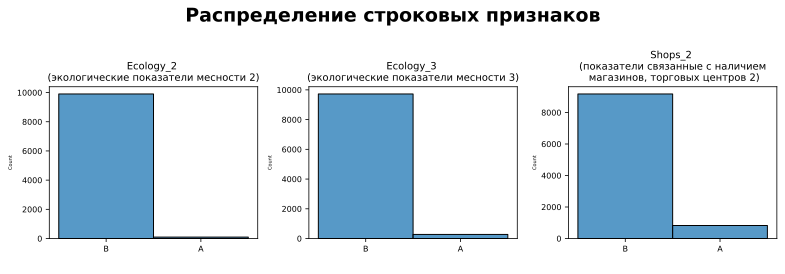

In [14]:
plt.figure(figsize=[11, 6])
plt.suptitle('Распределение строковых признаков',
              y=1.005,
              fontsize=19,
              fontweight='bold')
index_plt = 1
for col in str_cols:
    plt.subplot(2, 3, index_plt)
    plt.title(f'{col} \n({translate_col[col]})', fontsize=10)
    plt.xticks(fontsize=8, rotation=0)
    plt.yticks(fontsize=8, rotation=0)
    plt.xlabel(' ')
    plt.ylabel('', fontsize=5)
    sns.histplot(train[col])
    index_plt += 1
plt.tight_layout()
plt.show()

Найдем признаки, которые имеют выбросы

In [15]:
def emission_test(ds, col_test, threshold_val=3):
    result = ''
    NUM = 2
    outliers_list = []
    for col in col_test:
        z = np.abs(stats.zscore(ds[col]))
        threshold = 3
        outliers = ds[col][z > threshold]

        if len(outliers) > 0:
            outliers_list.append(outliers)

            result += f'В столбце {col} ({translate_col[col]}),\n{len(outliers)} выбросов. Mean: {round(ds[col].mean(), NUM)}, ' \
            f'Min: {round(ds[col].min(), NUM)}, Max: {round(ds[col].max(), NUM)}, ' \
            f'Moda: {round(ds[col].mode()[0], NUM)}, Median: {round(ds[col].median(), NUM)} \n\n'

    return f'Выбросов нет. ' if result == '' else result, outliers_list
def view_outliers(outliers_list, col_name):
    for item in outliers:
        if item.name == col_name:
            return item.index
text_outliers, outliers = emission_test(ds=train, col_test=num_cols)
print(text_outliers)

В столбце DistrictId (идентификационный номер района),
88 выбросов. Mean: 50.4, Min: 0, Max: 209, Moda: 27, Median: 36.0 

В столбце Rooms (количество комнат),
22 выбросов. Mean: 1.89, Min: 0.0, Max: 19.0, Moda: 2.0, Median: 2.0 

В столбце Square (площадь),
93 выбросов. Mean: 56.32, Min: 1.14, Max: 641.07, Moda: 1.14, Median: 52.51 

В столбце KitchenSquare (площадь кухни),
6 выбросов. Mean: 6.27, Min: 0.0, Max: 2014.0, Moda: 1.0, Median: 6.0 

В столбце Floor (этаж),
66 выбросов. Mean: 8.53, Min: 1, Max: 42, Moda: 4, Median: 7.0 

В столбце HouseFloor (количество этажей в доме),
23 выбросов. Mean: 12.61, Min: 0.0, Max: 117.0, Moda: 17.0, Median: 13.0 

В столбце HouseYear (год постройки дома),
1 выбросов. Mean: 3990.17, Min: 1910, Max: 20052011, Moda: 1977, Median: 1977.0 

В столбце Ecology_1 (экологические показатели месности 1),
61 выбросов. Mean: 0.12, Min: 0.0, Max: 0.52, Moda: 0.01, Median: 0.08 

В столбце Social_2 (социальные показатели месности 2),
176 выбросов. Mean: 5352.1

# Поработаем с признаками

#Год постройки дома

Выявим даты больше текущей

In [16]:
train[train['HouseYear'] > datetime.now().year]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.00,37.27,20.24,9.00,9,12.00,20052011,0.14,B,B,30,6141,10,262.00,3,6,B,254084.53
4189,11607,147,2.00,44.79,28.36,5.00,4,9.00,4968,0.32,B,B,25,4756,16,2857.00,5,8,B,243028.60


Очевидная ошибка. Заменим значением моды

In [17]:
train.loc[train['HouseYear'] > datetime.now().year, ['HouseYear']] = train['HouseYear'].mode()[0]
train['HouseYear'].describe()

,HouseYear
count,10000.00
mean,1984.86
std,18.41
min,1910.00
25%,1974.00
50%,1977.00
75%,2001.00
max,2020.00


Выбросы

In [18]:
print(emission_test(ds=train, col_test=['HouseYear'])[0])

В столбце HouseYear (год постройки дома),
19 выбросов. Mean: 1984.86, Min: 1910, Max: 2020, Moda: 1977, Median: 1977.0 




# Количество комнат

In [19]:
train.loc[view_outliers(outliers, 'Rooms')].sort_values(by='Rooms')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4762,4070,21,5.00,114.31,88.49,9.00,6,5.00,1960,0.03,B,B,25,5487,3,NaN,0,4,B,499830.94
8925,4214,105,5.00,85.31,56.69,5.00,4,12.00,1967,0.04,B,B,25,3478,11,2729.00,3,1,B,461678.74
8726,238,88,5.00,90.76,70.99,5.00,1,9.00,1972,0.13,B,B,43,8429,3,NaN,3,9,B,289683.94
8659,14143,13,5.00,119.01,69.03,11.00,13,17.00,2001,0.09,B,B,74,19083,2,NaN,5,15,B,434774.36
8511,4249,23,5.00,198.93,123.14,10.00,1,2.00,2011,0.01,B,B,2,475,0,NaN,0,0,B,345665.21
6988,8685,62,5.00,124.93,81.12,30.00,5,3.00,2017,0.07,B,B,2,629,1,NaN,0,0,A,271919.87
6623,3294,167,5.00,111.05,81.94,9.00,6,6.00,1940,0.05,B,B,21,4231,14,1020.00,0,3,B,513239.50
5466,3454,8,5.00,112.14,79.80,10.00,4,17.00,1999,0.44,B,B,23,5735,3,1084.00,0,5,B,471833.79
5361,2879,78,5.00,118.87,69.02,10.00,15,16.00,1998,0.09,B,B,21,4346,2,165.00,1,2,B,496026.67
9432,338,46,5.00,147.71,NaN,0.00,6,0.00,1977,0.15,B,B,16,3433,4,2643.00,4,5,B,352168.96


In [20]:
train['Rooms'].value_counts()

,count
Rooms,
2.00,3880
1.00,3705
3.00,2235
4.00,150
5.00,18
0.00,8
10.00,2
19.00,1
6.00,1


Кватиры без комнат

In [21]:
train.query('(Rooms == 0)')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.00,138.43,136.22,0.00,4,3.00,2016,0.08,B,B,11,3097,0,NaN,0,0,B,268394.74
1981,7917,27,0.00,212.93,211.23,0.00,2,3.00,2008,0.21,B,B,9,1892,0,NaN,0,1,B,302211.26
2269,7317,27,0.00,41.79,NaN,0.00,13,0.00,1977,0.21,B,B,9,1892,0,NaN,0,1,B,98129.98
3911,770,28,0.00,49.48,NaN,0.00,16,0.00,2015,0.12,B,B,30,6207,1,1183.00,1,0,B,217009.34
4366,456,6,0.00,81.49,NaN,0.00,4,0.00,1977,0.24,B,B,5,1564,0,540.00,0,0,B,212864.80
4853,3224,27,0.00,2.38,0.87,0.00,1,0.00,1977,0.02,B,B,2,469,0,NaN,0,0,B,126596.94
6149,3159,88,0.00,38.70,19.35,9.00,9,16.00,1982,0.13,B,B,43,8429,3,NaN,3,9,B,158998.11
8834,9443,27,0.00,87.76,85.13,0.00,5,15.00,1977,0.21,B,B,9,1892,0,NaN,0,1,B,219281.92


Создадим индексы строк в которых 5 и более комнат, а их площадь менее 100 или меньше одной комнаты и заменим аномальные значения на медиану

In [22]:
index_edit = train.query('(((Rooms >= 5) & (Square < 100)) | (Rooms < 1))').index

train.loc[index_edit, ['Rooms']] = train['Rooms'].median()

train['Rooms'].describe()

,Rooms
count,10000.00
mean,1.89
std,0.81
min,1.00
25%,1.00
50%,2.00
75%,2.00
max,5.00


Выбросы

In [23]:
print(emission_test(ds=train, col_test=['Rooms'])[0])

В столбце Rooms (количество комнат),
13 выбросов. Mean: 1.89, Min: 1.0, Max: 5.0, Moda: 2.0, Median: 2.0 




#Площадь кухни

Выбросы

In [24]:
train.loc[view_outliers(outliers, 'KitchenSquare')].sort_values(by='KitchenSquare')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2916,12390,72,3.00,97.49,99.32,96.00,22,25.00,2019,0.21,B,B,11,2398,2,1994.00,3,0,B,445074.96
2969,7441,62,3.00,114.73,112.59,112.00,3,3.00,2015,0.07,B,B,2,629,1,NaN,0,0,A,315245.52
4651,12552,58,3.00,116.41,113.11,112.00,3,3.00,2016,0.44,B,B,23,5735,3,1084.00,0,5,B,296165.94
9895,2737,27,3.00,123.43,125.81,123.00,5,10.00,2015,0.02,B,B,2,469,0,NaN,0,0,B,234194.84
8584,14679,81,1.00,32.28,19.28,1970.00,6,1.00,1977,0.01,B,B,30,5285,0,645.00,6,6,B,105539.56
1064,14656,62,1.00,47.10,46.45,2014.00,4,1.00,2014,0.07,B,B,2,629,1,NaN,0,0,A,108337.48


In [25]:
train['KitchenSquare'].value_counts().sort_values()

,count
KitchenSquare,
123.00,1
84.00,1
75.00,1
21.00,1
54.00,1
62.00,1
40.00,1
29.00,1
1970.00,1


Квартиры без кухни

In [26]:
train.query('(KitchenSquare == 0)').sort_values(by='Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4853,3224,27,2.00,2.38,0.87,0.00,1,0.00,1977,0.02,B,B,2,469,0,NaN,0,0,B,126596.94
8030,13265,1,3.00,4.82,79.77,0.00,6,17.00,1977,0.01,B,B,1,264,0,NaN,0,1,B,237716.68
7767,6927,21,1.00,16.12,8.82,0.00,2,5.00,1965,0.19,B,B,47,8004,3,125.00,3,5,B,79913.27
1891,13685,0,1.00,17.50,13.45,0.00,7,5.00,1961,0.32,B,B,25,4756,16,2857.00,5,8,B,88871.75
9516,14236,0,1.00,19.93,15.54,0.00,2,5.00,1962,0.32,B,B,25,4756,16,2857.00,5,8,B,102395.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,12638,27,2.00,138.43,136.22,0.00,4,3.00,2016,0.08,B,B,11,3097,0,NaN,0,0,B,268394.74
9432,338,46,5.00,147.71,NaN,0.00,6,0.00,1977,0.15,B,B,16,3433,4,2643.00,4,5,B,352168.96
8913,2603,30,3.00,162.59,164.53,0.00,2,3.00,1977,0.00,B,B,22,6398,141,1046.00,3,23,B,207407.35
6201,10678,17,4.00,170.02,NaN,0.00,12,0.00,1977,0.09,B,B,23,4635,5,3300.00,2,4,B,531049.72


Кухни больше 20 м

In [27]:
train.query('(KitchenSquare > 20)').sort_values(by='KitchenSquare')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8182,16511,52,3.00,135.73,71.58,21.00,26,25.00,2008,0.37,B,B,34,7065,1,750.00,2,5,B,495110.65
622,12924,30,3.00,92.47,53.65,22.00,3,2.00,2018,0.00,B,B,22,6398,141,1046.00,3,23,B,165521.20
1804,11459,79,1.00,98.73,49.78,22.00,18,24.00,2019,0.05,B,B,24,5469,1,145.00,0,1,B,351021.80
8390,13559,79,1.00,96.84,49.14,22.00,19,24.00,2016,0.05,B,B,24,5469,1,145.00,0,1,B,348962.86
2656,14556,183,4.00,151.15,98.19,23.00,6,7.00,1912,0.04,B,B,32,6748,93,562.00,4,10,B,284884.96
9910,16568,27,4.00,200.33,201.63,25.00,1,2.00,2013,0.04,B,B,53,14892,4,NaN,1,4,B,528560.51
7249,3431,62,2.00,60.72,40.72,25.00,5,12.00,2012,0.39,B,B,5,1135,0,NaN,0,0,A,172366.01
1982,5548,86,5.00,275.65,233.95,26.00,12,37.00,2011,0.16,B,A,31,7010,5,4508.00,3,7,B,455264.88
8921,12074,94,3.00,108.96,51.06,27.00,2,22.00,2008,0.28,B,B,33,8667,2,NaN,0,6,B,562559.60
5653,8500,31,1.00,80.61,25.30,29.00,6,40.00,2014,0.15,B,A,32,5889,10,830.00,4,1,B,460492.01


Кухни больше 35 м

In [28]:
train.query('(KitchenSquare > 35)').sort_values(by='KitchenSquare')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3379,16781,27,1.00,36.14,36.71,36.00,19,19.00,2017,0.07,B,B,2,629,1,NaN,0,0,A,131742.54
1077,9690,27,1.00,40.08,37.83,37.00,18,19.00,2019,0.21,B,B,9,1892,0,NaN,0,1,B,93218.65
5849,11624,46,1.00,42.98,24.22,37.00,15,16.00,1983,0.19,B,B,31,6137,4,NaN,0,1,B,198450.74
9111,6708,48,1.00,42.07,22.49,39.00,1,10.00,2010,0.04,B,B,46,9515,5,NaN,1,10,B,200021.84
5816,2271,27,1.00,43.29,42.84,40.00,12,11.00,2015,0.21,B,B,9,1892,0,NaN,0,1,B,117296.17
4588,448,48,1.00,41.19,1.63,41.00,2,1.00,1977,0.04,B,B,46,9515,5,NaN,1,10,B,216882.27
4142,15466,88,1.00,42.36,44.78,41.00,10,19.00,2016,0.13,B,B,43,8429,3,NaN,3,9,B,194525.10
3431,7111,27,2.00,139.07,89.79,42.00,5,3.00,2016,0.01,B,B,2,475,0,NaN,0,0,B,153946.78
7480,10546,62,1.00,46.01,43.42,43.00,4,17.00,2019,0.07,B,B,2,629,1,NaN,0,0,A,113909.10
1867,3267,58,3.00,138.98,138.00,43.00,2,2.00,1977,0.44,B,B,23,5735,3,1084.00,0,5,B,169528.90


Найдем квантили и медиану

In [29]:
train['KitchenSquare'].quantile(0.975), train['KitchenSquare'].quantile(0.025), train['KitchenSquare'].median()

(13.0, 0.0, 6.0)

Заменим все кухни, которые больше 35 квадратов на медиану

In [30]:
train.loc[train['KitchenSquare'] > 35, ['KitchenSquare']] = train['KitchenSquare'].median()
train['KitchenSquare'].describe()

,KitchenSquare
count,10000.00
mean,5.71
std,3.97
min,0.00
25%,1.00
50%,6.00
75%,9.00
max,35.00


In [31]:
print(emission_test(ds=train, col_test=['KitchenSquare'])[0])

В столбце KitchenSquare (площадь кухни),
47 выбросов. Mean: 5.71, Min: 0.0, Max: 35.0, Moda: 1.0, Median: 6.0 




# Общая и жилая площади

Выбросы

In [32]:
train.loc[view_outliers(outliers, 'Square')].sort_values(by='Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1726,5284,27,4.00,119.91,78.52,13.00,8,12.00,2015,0.07,B,B,2,629,1,NaN,0,0,A,221374.06
727,13690,76,3.00,120.54,68.23,11.00,6,14.00,2014,0.00,B,B,7,1660,39,1786.00,1,5,B,416188.70
8944,3627,27,3.00,120.77,118.05,1.00,8,1.00,1977,0.07,B,B,2,629,1,NaN,0,0,A,275644.71
4979,14973,125,3.00,120.86,65.76,19.00,7,10.00,1999,0.19,B,B,47,8004,3,125.00,3,5,B,536670.67
5416,10558,169,4.00,120.88,73.40,12.00,14,17.00,2000,0.18,B,B,18,3594,4,192.00,1,5,B,585105.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,7917,27,2.00,212.93,211.23,0.00,2,3.00,2008,0.21,B,B,9,1892,0,NaN,0,1,B,302211.26
1982,5548,86,5.00,275.65,233.95,26.00,12,37.00,2011,0.16,B,A,31,7010,5,4508.00,3,7,B,455264.88
4690,2307,102,1.00,409.43,410.64,10.00,4,4.00,2016,0.24,B,B,26,3889,6,705.00,3,6,B,90470.43
4262,28,9,2.00,604.71,NaN,1.00,17,18.00,1977,0.16,B,B,25,5648,1,30.00,2,4,B,187717.24


Количество уникальных площадей

In [33]:
train['Square'].value_counts().sort_values()

,count
Square,
47.98,1
57.97,1
44.95,1
53.35,1
39.65,1
...,...
80.63,1
64.86,1
50.40,1


Количество уникальных жилых площадей

In [34]:
train['LifeSquare'].value_counts().sort_values()

,count
LifeSquare,
29.44,1
23.78,1
46.68,1
37.16,1
18.92,1
...,...
33.84,1
22.65,1
20.94,1


Квартиры меньше 20 м

In [35]:
train.query('(Square < 20)').sort_values(by='Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6392,14786,1,1.00,1.14,4.53,1.00,3,1.00,1977,0.01,B,B,1,264,0,NaN,0,1,B,181434.83
8283,15744,34,1.00,1.99,2.64,1.00,21,4.00,1977,0.07,B,B,53,13670,4,NaN,1,11,B,458378.78
4853,3224,27,2.00,2.38,0.87,0.00,1,0.00,1977,0.02,B,B,2,469,0,NaN,0,0,B,126596.94
1608,10202,6,1.00,2.60,4.60,1.00,3,25.00,2014,0.24,B,B,5,1564,0,540.00,0,0,B,137597.60
9294,6782,45,1.00,2.95,5.26,1.00,3,1.00,1977,0.20,B,B,23,5212,6,NaN,3,2,B,438005.18
3280,10527,27,1.00,4.38,40.81,1.00,10,17.00,2013,0.21,B,B,9,1892,0,NaN,0,1,B,97560.72
4900,4504,27,3.00,4.39,5.61,1.00,8,19.00,2016,0.21,B,B,9,1892,0,NaN,0,1,B,161379.07
9613,7657,38,1.00,4.50,4.62,1.00,28,1.00,1977,0.06,B,B,15,2787,2,520.00,0,7,B,483283.49
1316,11526,27,1.00,4.63,1.97,1.00,18,1.00,1977,0.01,B,B,4,915,0,NaN,0,0,B,107604.27
8030,13265,1,3.00,4.82,79.77,0.00,6,17.00,1977,0.01,B,B,1,264,0,NaN,0,1,B,237716.68


Квартиры, в которых общая площадь меньше жилой площади

In [36]:
train.query('(Square < LifeSquare)').sort_values(by='Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6392,14786,1,1.00,1.14,4.53,1.00,3,1.00,1977,0.01,B,B,1,264,0,NaN,0,1,B,181434.83
8283,15744,34,1.00,1.99,2.64,1.00,21,4.00,1977,0.07,B,B,53,13670,4,NaN,1,11,B,458378.78
1608,10202,6,1.00,2.60,4.60,1.00,3,25.00,2014,0.24,B,B,5,1564,0,540.00,0,0,B,137597.60
9294,6782,45,1.00,2.95,5.26,1.00,3,1.00,1977,0.20,B,B,23,5212,6,NaN,3,2,B,438005.18
3280,10527,27,1.00,4.38,40.81,1.00,10,17.00,2013,0.21,B,B,9,1892,0,NaN,0,1,B,97560.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8913,2603,30,3.00,162.59,164.53,0.00,2,3.00,1977,0.00,B,B,22,6398,141,1046.00,3,23,B,207407.35
3651,5300,30,3.00,169.51,170.71,1.00,2,2.00,2018,0.00,B,B,22,6398,141,1046.00,3,23,B,200800.67
1641,11055,151,1.00,174.65,174.84,15.00,10,12.00,1958,0.24,B,B,16,3893,27,NaN,3,10,B,232766.19
9910,16568,27,4.00,200.33,201.63,25.00,1,2.00,2013,0.04,B,B,53,14892,4,NaN,1,4,B,528560.51


Найдем квартиры менее 10 метров

In [37]:
train.query('(Square <= 10)')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.00,5.50,67.63,1.00,24,22.00,1977,0.13,B,B,43,8429,3,NaN,3,9,B,412511.09
1316,11526,27,1.00,4.63,1.97,1.00,18,1.00,1977,0.01,B,B,4,915,0,NaN,0,0,B,107604.27
1608,10202,6,1.00,2.60,4.60,1.00,3,25.00,2014,0.24,B,B,5,1564,0,540.00,0,0,B,137597.60
3280,10527,27,1.00,4.38,40.81,1.00,10,17.00,2013,0.21,B,B,9,1892,0,NaN,0,1,B,97560.72
3413,9487,5,1.00,5.13,5.55,1.00,1,1.00,1977,0.15,B,B,16,3433,4,2643.00,4,5,B,369472.40
4853,3224,27,2.00,2.38,0.87,0.00,1,0.00,1977,0.02,B,B,2,469,0,NaN,0,0,B,126596.94
4900,4504,27,3.00,4.39,5.61,1.00,8,19.00,2016,0.21,B,B,9,1892,0,NaN,0,1,B,161379.07
6392,14786,1,1.00,1.14,4.53,1.00,3,1.00,1977,0.01,B,B,1,264,0,NaN,0,1,B,181434.83
8030,13265,1,3.00,4.82,79.77,0.00,6,17.00,1977,0.01,B,B,1,264,0,NaN,0,1,B,237716.68
8283,15744,34,1.00,1.99,2.64,1.00,21,4.00,1977,0.07,B,B,53,13670,4,NaN,1,11,B,458378.78


Посмотрим статистику


In [38]:
train['LifeSquare'].describe()

,LifeSquare
count,7887.00
mean,37.20
std,86.24
min,0.37
25%,22.77
50%,32.78
75%,45.13
max,7480.59


Посмотрим квартиры с жилой площадью больше максимальной площади


In [39]:
train[train['LifeSquare'] > train['Square'].max()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.00,81.69,7480.59,1.00,9,17.00,2016,0.02,B,B,2,469,0,NaN,0,0,B,217357.49


Округлим метраж квартир до целых

In [40]:
train['Square'] = train['Square'].apply(lambda x: round(x, 0))
train['LifeSquare'] = train['LifeSquare'].apply(lambda x: round(x, 0))
train.loc[(train['LifeSquare'] > train['Square'].max()), ['LifeSquare']] = train['Square']

Заменим площади квартир менее 10 м на 10

In [41]:
train.loc[(train['Square'] < 10), ['Square']] = 10

Заменим некорректные значения Square на LifeSquare + KitchenSquare

In [42]:
train.loc[(train['Square'] < train['LifeSquare']), ['Square']] = train['LifeSquare'] + train['KitchenSquare']

Заменим некорректные значения LifeSquare на Square - KitchenSquare

In [43]:
train.loc[(train['Square'] == train['LifeSquare']), ['LifeSquare']] = train['Square'] - train['KitchenSquare']

Заменим недостающие значения LifeSquare или значения < 20.

In [44]:
train.loc[((train['LifeSquare'].isna()) | (train['LifeSquare'] < 20)), ['LifeSquare']] = train['Square'] - train['KitchenSquare']

Выбросы после чистки данных

In [45]:
print(emission_test(ds=train, col_test=['Square', 'LifeSquare', 'KitchenSquare'])[0])

В столбце Square (площадь),
91 выбросов. Mean: 56.61, Min: 10.0, Max: 641.0, Moda: 42.0, Median: 53.0 

В столбце LifeSquare (жилая площадь),
83 выбросов. Mean: 42.75, Min: 9.0, Max: 638.0, Moda: 21.0, Median: 38.0 

В столбце KitchenSquare (площадь кухни),
47 выбросов. Mean: 5.71, Min: 0.0, Max: 35.0, Moda: 1.0, Median: 6.0 




In [46]:
outliers = emission_test(ds=train, col_test=['Square', 'LifeSquare'])[1]

Посмотрим выбросы в Square после чистки данных

In [47]:
train.loc[view_outliers(outliers, 'Square')].sort_values(by='Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4839,1511,20,4.00,122.00,73.00,14.00,16,24.00,2011,0.02,B,B,37,7687,11,176.00,5,5,B,402234.34
3988,10345,1,3.00,122.00,122.00,0.00,7,0.00,1977,0.01,B,B,1,264,0,NaN,0,1,B,437730.06
2194,11599,23,1.00,122.00,121.00,1.00,2,2.00,1977,0.01,B,B,2,475,0,NaN,0,0,B,273307.25
5425,3377,85,3.00,122.00,121.00,1.00,4,17.00,2016,0.04,B,B,52,11217,1,2300.00,1,7,B,554809.41
6230,2929,30,4.00,122.00,68.00,1.00,1,2.00,2017,0.00,B,B,22,6398,141,1046.00,3,23,B,224808.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,5548,86,5.00,276.00,234.00,26.00,12,37.00,2011,0.16,B,A,31,7010,5,4508.00,3,7,B,455264.88
4690,2307,102,1.00,421.00,411.00,10.00,4,4.00,2016,0.24,B,B,26,3889,6,705.00,3,6,B,90470.43
8437,15886,85,3.00,471.00,461.00,10.00,12,16.00,1998,0.04,B,B,52,11217,1,2300.00,1,7,B,394253.30
4262,28,9,2.00,605.00,604.00,1.00,17,18.00,1977,0.16,B,B,25,5648,1,30.00,2,4,B,187717.24


Посмотрим выбросы в LifeSquare после чистки данных

In [48]:
train.loc[view_outliers(outliers, 'LifeSquare')].sort_values(by='LifeSquare')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9589,16638,38,1.00,110.00,109.00,1.00,4,1.00,1977,0.06,B,B,15,2787,2,520.00,0,7,B,509162.42
9721,396,54,3.00,110.00,109.00,1.00,8,1.00,2015,0.01,B,B,30,5285,0,645.00,6,6,B,491296.25
1784,13526,27,3.00,109.00,109.00,0.00,5,12.00,1977,0.07,B,B,2,629,1,NaN,0,0,A,265528.52
4987,5533,23,4.00,111.00,110.00,1.00,4,3.00,2015,0.03,B,B,0,168,0,NaN,0,0,B,206796.67
8949,13178,30,1.00,112.00,111.00,1.00,9,8.00,2015,0.00,B,B,22,6398,141,1046.00,3,23,B,456417.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,14990,23,2.00,269.00,264.00,5.00,6,5.00,1972,0.08,B,B,6,1437,3,NaN,0,2,B,141780.23
4690,2307,102,1.00,421.00,411.00,10.00,4,4.00,2016,0.24,B,B,26,3889,6,705.00,3,6,B,90470.43
8437,15886,85,3.00,471.00,461.00,10.00,12,16.00,1998,0.04,B,B,52,11217,1,2300.00,1,7,B,394253.30
4262,28,9,2.00,605.00,604.00,1.00,17,18.00,1977,0.16,B,B,25,5648,1,30.00,2,4,B,187717.24


Cтатистические данные сильно не изменились

#Этажность

In [49]:
train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

Квартиры на этажах

In [50]:
train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

Сравним этажность дома и этаж квартиры  и определим количество квартир на этаже выше этажности дома

In [51]:
(train['Floor'] > train['HouseFloor']).sum()

1825

Выбросы

In [52]:
outliers = emission_test(ds=train, col_test=['HouseFloor', 'Floor'])[1]

train.loc[view_outliers(outliers, 'HouseFloor')].sort_values(by='HouseFloor')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
5452,11625,84,1.00,103.00,79.00,19.00,26,36.00,2012,0.01,B,B,30,5285,0,645.00,6,6,B,342223.03
1956,15157,54,1.00,106.00,83.00,17.00,26,37.00,2009,0.01,B,B,30,5285,0,645.00,6,6,B,274139.07
1982,5548,86,5.00,276.00,234.00,26.00,12,37.00,2011,0.16,B,A,31,7010,5,4508.00,3,7,B,455264.88
3662,1102,54,3.00,101.00,52.00,20.00,20,37.00,2014,0.01,B,B,30,5285,0,645.00,6,6,B,124844.93
5270,6327,146,3.00,75.00,46.00,9.00,11,37.00,2010,0.24,B,B,16,3893,27,NaN,3,10,B,288203.45
6755,8296,146,1.00,86.00,72.00,0.00,37,38.00,2012,0.24,B,B,16,3893,27,NaN,3,10,B,269113.58
6459,3302,30,2.00,105.00,86.00,6.00,25,39.00,2009,0.00,B,B,22,6398,141,1046.00,3,23,B,193885.92
4525,14773,30,1.00,106.00,87.00,5.00,14,39.00,2010,0.00,B,B,22,6398,141,1046.00,3,23,B,476843.94
8357,8016,31,1.00,60.00,24.00,10.00,33,40.00,1977,0.15,B,A,32,5889,10,830.00,4,1,B,389554.06
8340,15270,31,2.00,81.00,47.00,16.00,15,40.00,1977,0.15,B,A,32,5889,10,830.00,4,1,B,547586.08


Экстремумы

In [53]:
train[train['HouseFloor'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.00,80.00,80.00,0.00,14,0.00,1977,0.08,B,B,6,1437,3,NaN,0,2,B,221244.16
23,6641,54,3.00,119.00,119.00,0.00,2,0.00,1977,0.01,B,B,30,5285,0,645.00,6,6,B,571069.05
26,4378,27,3.00,107.00,107.00,0.00,17,0.00,2018,0.07,B,B,2,629,1,NaN,0,0,A,337299.87
39,9371,23,2.00,61.00,61.00,0.00,16,0.00,1977,0.03,B,B,0,168,0,NaN,0,0,B,229778.06
44,10521,38,3.00,106.00,106.00,0.00,20,0.00,2017,0.06,B,B,15,2787,2,520.00,0,7,B,435462.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1.00,48.00,48.00,0.00,4,0.00,1977,0.00,B,B,22,6398,141,1046.00,3,23,B,161403.09
9769,9384,59,3.00,99.00,99.00,0.00,14,0.00,1977,0.02,B,B,37,7687,11,176.00,5,5,B,492700.26
9878,11441,62,2.00,72.00,72.00,0.00,5,0.00,1977,0.07,B,B,2,629,1,NaN,0,0,A,158841.62
9908,3171,62,1.00,36.00,36.00,0.00,25,0.00,1977,0.07,B,B,2,629,1,NaN,0,0,A,134379.13


Выбросы по параметру этаж

In [54]:
train.loc[view_outliers(outliers, 'Floor')].sort_values(by='Floor')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7730,12301,34,1.00,29.00,28.00,1.00,25,25.00,2016,0.07,B,B,53,13670,4,NaN,1,11,B,179573.84
7392,8464,103,1.00,55.00,24.00,12.00,25,16.00,2008,0.15,B,A,32,5889,10,830.00,4,1,B,425716.95
6502,5563,23,3.00,104.00,103.00,1.00,25,25.00,1977,0.08,B,B,6,1437,3,NaN,0,2,B,245484.32
3576,3797,28,3.00,90.00,55.00,11.00,25,23.00,2010,0.33,B,B,30,6564,1,NaN,0,0,B,176513.84
6459,3302,30,2.00,105.00,86.00,6.00,25,39.00,2009,0.00,B,B,22,6398,141,1046.00,3,23,B,193885.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3298,31,1.00,58.00,22.00,10.00,32,40.00,1977,0.15,B,A,32,5889,10,830.00,4,1,B,393799.53
339,11563,8,1.00,50.00,42.00,0.00,32,32.00,2008,0.09,B,B,21,4346,2,165.00,1,2,B,97480.85
8357,8016,31,1.00,60.00,24.00,10.00,33,40.00,1977,0.15,B,A,32,5889,10,830.00,4,1,B,389554.06
6755,8296,146,1.00,86.00,72.00,0.00,37,38.00,2012,0.24,B,B,16,3893,27,NaN,3,10,B,269113.58


In [55]:
train[train['Floor'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Корректируем данные

In [56]:
def random_floor(floor):
    house_floor_list = [5, 9, 14, 16, 24, 40, 48]
    weights = [5, 10, 20, 20, 10, 2, 1]
    weights_corr = [weights[i] if house_floor_list[i] >= floor else 0 for i in range(len(weights))]

    if sum(weights_corr):
        house_floor = rnd.choices(house_floor_list, weights=weights_corr, k=1)
        return house_floor[0]
    else:
        return -1
rnd.seed(42)
train['HouseFloor'] = train['Floor'].apply(lambda x: random_floor(x))

Выбросы после чистки данных

In [57]:
print(emission_test(ds=train, col_test=['Floor', 'HouseFloor'])[0])

В столбце Floor (этаж),
66 выбросов. Mean: 8.53, Min: 1, Max: 42, Moda: 4, Median: 7.0 

В столбце HouseFloor (количество этажей в доме),
245 выбросов. Mean: 18.14, Min: 5, Max: 48, Moda: 16, Median: 16.0 




Таблицу выбросов для 'Floor' и 'HouseFloor'

In [58]:
outliers = emission_test(ds=train, col_test=['Floor', 'HouseFloor'])[1]

Выбросы в Floor после чистки данных

In [59]:
train.loc[view_outliers(outliers, 'Floor')].sort_values(by='Floor')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7730,12301,34,1.00,29.00,28.00,1.00,25,40,2016,0.07,B,B,53,13670,4,NaN,1,11,B,179573.84
7392,8464,103,1.00,55.00,24.00,12.00,25,40,2008,0.15,B,A,32,5889,10,830.00,4,1,B,425716.95
6502,5563,23,3.00,104.00,103.00,1.00,25,40,1977,0.08,B,B,6,1437,3,NaN,0,2,B,245484.32
3576,3797,28,3.00,90.00,55.00,11.00,25,40,2010,0.33,B,B,30,6564,1,NaN,0,0,B,176513.84
6459,3302,30,2.00,105.00,86.00,6.00,25,40,2009,0.00,B,B,22,6398,141,1046.00,3,23,B,193885.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3298,31,1.00,58.00,22.00,10.00,32,40,1977,0.15,B,A,32,5889,10,830.00,4,1,B,393799.53
339,11563,8,1.00,50.00,42.00,0.00,32,40,2008,0.09,B,B,21,4346,2,165.00,1,2,B,97480.85
8357,8016,31,1.00,60.00,24.00,10.00,33,40,1977,0.15,B,A,32,5889,10,830.00,4,1,B,389554.06
6755,8296,146,1.00,86.00,72.00,0.00,37,48,2012,0.24,B,B,16,3893,27,NaN,3,10,B,269113.58


Выбросы в HouseFloor после чистки данных

In [60]:
train.loc[view_outliers(outliers, 'HouseFloor')].sort_values(by='HouseFloor')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
60,16601,88,2.00,47.00,31.00,6.00,6,48,1975,0.13,B,B,43,8429,3,NaN,3,9,B,207641.68
6259,9548,21,3.00,79.00,48.00,12.00,6,48,2009,0.03,B,B,25,5487,3,NaN,0,4,B,198640.03
6280,15879,13,2.00,54.00,35.00,8.00,17,48,2000,0.09,B,B,74,19083,2,NaN,5,15,B,250090.49
6373,13719,48,1.00,45.00,44.00,1.00,18,48,1977,0.04,B,B,46,9515,5,NaN,1,10,B,249076.68
6393,2965,45,3.00,77.00,77.00,0.00,25,48,1977,0.20,B,B,23,5212,6,NaN,3,2,B,410641.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,11678,105,1.00,35.00,29.00,6.00,8,48,1975,0.07,B,B,31,6119,4,NaN,1,2,B,177058.13
3095,13017,54,3.00,68.00,49.00,8.00,1,48,1950,0.01,B,B,30,5285,0,645.00,6,6,B,160694.58
3097,12932,35,1.00,46.00,45.00,1.00,13,48,2015,0.09,B,B,33,7976,5,NaN,0,11,B,195895.98
3252,1560,59,2.00,65.00,39.00,7.00,2,48,1957,0.31,B,B,35,7715,4,990.00,0,6,B,240308.62


Скорректировали данные по признакам Этажности и Этажам

#Признак  'Healthcare_1'

Признак 'Healthcare_1' не информативен, т.к. незаболнены более половины позиций. Удалим признак из статистики.

In [61]:
train.drop('Healthcare_1', axis=1, inplace=True)

# Преобразуем тип признаков

In [62]:
le = LabelEncoder()
for col in str_cols:
    train[col] = le.fit_transform(train[col].astype(str))
train.dtypes

,0
Id,int64
DistrictId,int64
Rooms,float64
Square,float64
LifeSquare,float64
KitchenSquare,float64
Floor,int64
HouseFloor,int64
HouseYear,int64
Ecology_1,float64


Переведём Id квартиры в строковый формат

In [63]:
train['Id'] = train['Id'].astype(str)
train['Id'].dtypes

dtype('O')

Разделим числовые и строковые признаки

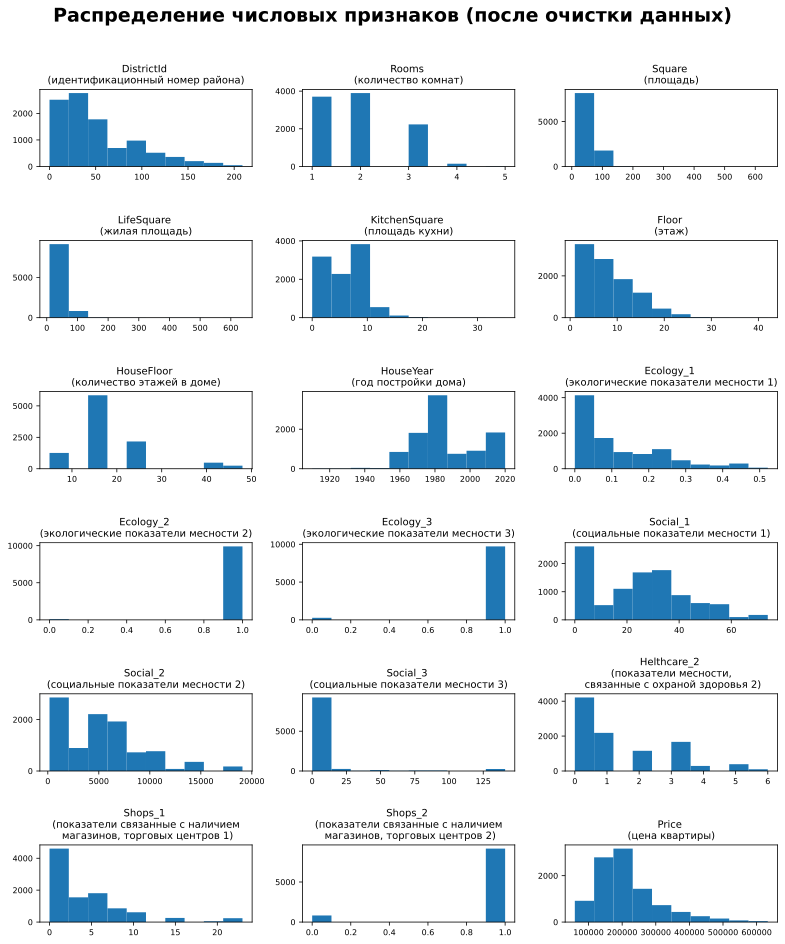

In [64]:
num_cols, str_cols = numeric_and_string_attributes(train)
num_attr(dop_text='(после очистки данных)')

# Класс подготовки данных

In [65]:
class DataPreprocessing():
    def __init__(self):

        self.house_year_mode = None
        self.kitchen_square_median = None
        self.rooms_median = None

    @staticmethod
    def random_floor(self, floor) -> int:

        house_floor_list = [5, 9, 14, 16, 24, 40, 48]

        weights = [5, 10, 20, 20, 10, 2, 1]

        weights_corr = [weights[i] if house_floor_list[i] >= floor else 0 for i in range(len(weights))]

        if sum(weights_corr):
            house_floor = rnd.choices(house_floor_list, weights=weights_corr, k=1)
            return house_floor[0]
        else:
            return -1

    @staticmethod
    def numeric_and_string_attributes(self, df):

        num_cols = []

        str_cols = []

        cols_and_type = df.dtypes.to_dict()

        for col in cols_and_type:
            if cols_and_type[col] in ('int64', 'float64'):
                num_cols.append(col)
            else:
                str_cols.append(col)

        return num_cols, str_cols

    def fit(self, X):

        self.house_year_mode = X['HouseYear'].mode()[0]
        self.kitchen_square_median = X['KitchenSquare'].median()
        self.rooms_median = X['Rooms'].median()


    def transform (self, X):

        X.loc[X['HouseYear'] > datetime.now().year, ['HouseYear']] = self.house_year_mode


        index_edit = X.query('(((Rooms >= 5) & (Square < 100)) | (Rooms < 1))').index

        X.loc[index_edit, ['Rooms']] = self.rooms_median


        X.loc[X['KitchenSquare'] > 35, ['KitchenSquare']] = self.kitchen_square_median

        X['Square'] = X['Square'].apply(lambda x: round(x, 0))
        X['LifeSquare'] = X['LifeSquare'].apply(lambda x: round(x, 0))

        X.loc[(X['LifeSquare'] > X['Square'].max()), ['LifeSquare']] = X['Square']

        X.loc[(X['Square'] < 10), ['Square']] = 10

        X.loc[(X['Square'] < X['LifeSquare']), ['Square']] = X['LifeSquare'] + X['KitchenSquare']

        X.loc[(X['Square'] == X['LifeSquare']), ['LifeSquare']] = X['Square'] - X['KitchenSquare']

        X.loc[((X['LifeSquare'].isna()) | (X['LifeSquare'] < 20)), ['LifeSquare']] = X['Square'] - X['KitchenSquare']

        rnd.seed(42)

        X['HouseFloor'] = X['Floor'].apply(lambda x: self.random_floor(self, x))


        X.drop('Healthcare_1', axis=1, inplace=True)


        num_cols, str_cols = self.numeric_and_string_attributes(self, X)

        le = LabelEncoder()

        for col in  str_cols:
            X[col] = le.fit_transform(X[col].astype(str))

        X['Id'] = X['Id'].astype(str)

        return X

# Проверка

In [66]:
train_new = pd.read_csv(TRAIN, engine='python', on_bad_lines='skip')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.00,48.00,29.00,6.00,7,16,1969,0.09,1,1,33,7976,5,0,11,1,184966.93
1,15053,41,3.00,66.00,40.00,8.00,7,9,1978,0.00,1,1,46,10309,1,1,16,1,300009.45
2,4765,53,2.00,45.00,29.00,0.00,8,14,1968,0.05,1,1,34,7759,0,1,3,1,220925.91
3,5809,58,2.00,53.00,44.00,9.00,8,14,1977,0.44,1,1,23,5735,3,0,5,1,175616.23
4,10783,99,1.00,40.00,24.00,7.00,11,16,1976,0.01,1,1,35,5776,1,2,4,1,150226.53


Создадим объект класса и сохраним статистические данные

In [67]:
dp = DataPreprocessing()

dp.fit(train_new)

Сохраним очищенный датасет

In [68]:
check = dp.transform(train_new)

Сравниваем измененные датасеты вручную и с помощью объекта класса

In [69]:
check.equals(train)

True

Этот результат показывает, что оба датасета идентичны. Работа проделана с одинаковым результатом.

# Построим новые признаки

Проверим, сколько стоит 1 кв.м. PricePerMeter

In [ ]:
district_size = train['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId', 'DistrictId': 'DistrictSize'})
district_size.head()

location_10 = train(by='locality_name')['locality_name'].count().sort_values(ascending=False)

In [70]:
train = pd.read_csv(TRAIN, engine='python', on_bad_lines='skip')
test = pd.read_csv(TEST, engine='python', on_bad_lines='skip')

Создаем объект класса

In [71]:
dp = DataPreprocessing()

Сохраним статистические данные, очищенный датасет (train), очищенный датасет (test)

In [72]:
dp.fit(train)
X = dp.transform(train)
test_data = dp.transform(test)

Создадим целевую переменную и удалим целевую переменную из тренировочных данных

In [73]:
y = X['Price']
X_not_price = X.drop('Price', axis=1)

Разделим выборку на тренировочную (70%) и валидную (30%)

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X_not_price, y, test_size=0.15, random_state=100)

Размеры датафреймов

In [77]:
(X_train.shape, X_valid.shape, test_data.shape)

((8500, 18), (1500, 18), (5000, 18))

# Итоговые выводы и завершение
print(f"Время выполнения всего процесса: {time.time() - start_time} секунд")

# Вывод метрик
print(f"Train R2: {r2_score(y_train, model.predict(X_train_processed))}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

https://github.com/ilyalevshenkov/Data_Science/blob/main/HW_5_DS_fin/1/hw_05_fin.ipynb

https://github.com/Anbionchik/Git_brain_lessons/blob/main/Python_libs/Course%20Work/Course_Work_Khlopkov.ipynb

https://github.com/pamaxpower/PyLib/blob/main/Course_project/pr/course_project.ipynb

https://github.com/dv-zheludkov/studying/blob/main/GB/Искусственный%20интеллект/Библиотеки%20Python%20для%20Data%20Science/Real%20Estate%20Price%20Prediction%20F.ipynb

https://github.com/uc20100/Python-for-Data-Science/blob/course_project/course_project.ipynb

https://github.com/pamaxpower/PyLib/blob/main/Course_project/pr/course_project.ipynb